<a href="https://colab.research.google.com/github/Alina2004A/BMD/blob/main/Levchenko_6_prakt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>6 практична</h1>
<p><font size=10>Левченко БС-11</font></p>

# Завдання

1. Обрати реальні дані з kaggle або сгенерувати випадкові дані. Дані мають відповідати вимогам викладеним вище. Формат даних:

| Група 1 | Група 2  | 
| ------------- |--------- |
| $k_{1}  $   | $k_{2}$   |
| $...$   | $...$   |
| $k_{1n}$   | $k_{2n}$   |

2. Побудувати графік, що відображає розкид даних в групах. Приклад:
![alt text](https://s3.amazonaws.com/libapps/accounts/2515/images/spss_paired-t_example_boxplot.PNG)

3. Написати функції:
* для оцінки зв'язку між групами за коефіцієнтом кореляції Пірсона. Функція має повертати значення коефіцієнту кореляції, значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant).

* для визначення відмінності між групами за критерієм Стьюдента. Функція має повертати значення критерію Стьюдента,значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant). 

4. Перевірити розбіжність на між групами на даних з п. 1. 

5. Сформувати висновок про взаємозв'язок між групами та про їх розбіжність. 

# Виконання

1. Обрати реальні дані з kaggle або сгенерувати випадкові дані.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
gr_1 = np.random.normal(5, 0.5, 20)
diff = lambda i:  np.random.normal(1, 0.25, 20) + 2.4 * i
gr_2 = diff(gr_1)
data = pd.DataFrame({"Група 1": gr_1, "Група 2": gr_2})
data

,Група 1,Група 2
0,4.729665,12.384418
1,5.029395,12.745346
2,4.713496,12.287362
3,5.629182,14.563409
4,5.246231,13.665957
5,3.804939,10.238391
6,5.355875,13.570848
7,3.873561,10.181903
8,4.758103,12.434459
9,5.040117,13.418406


2. Побудувати графік, що відображає розкид даних в групах.

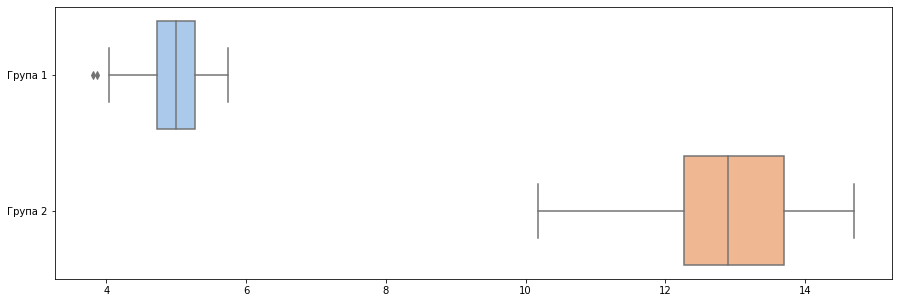

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
fig =  sns.boxplot(orient = "h",data = data, palette="pastel")

3. Написати функції:
* для оцінки зв'язку між групами за коефіцієнтом кореляції Пірсона. Функція має повертати значення коефіцієнту кореляції, значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant).

In [ ]:
def Cor_mark(r):
    if r > 0 and r <= 0.3:
            return "very low"
    elif r > 0.3 and r <= 0.5:
            return "low"
    elif r > 0.5 and r <= 0.7:
            return "medium"
    elif r > 0.7 and r <= 0.9:
            return "high"
    elif r > 0.9 and r <= 1:
            return "very high"

In [ ]:
def Cor_pirson(data):
    n = len(data)
    x, y = data.iloc[:,0], data.iloc[:,1]
    
    r1 = n * np.sum(x*y) - np.sum(x) * np.sum(y)
    r2 = (n * np.sum(x**2) - np.sum(x)**2) * (n * np.sum(y**2) - np.sum(y)**2)
    r = r1 / np.sqrt(r2)
    r = np.round(abs(r), 3)
    
    df = n - 2
    table = pd.read_excel("Таблиця критичних значень кореляційного аналізу.xlsx")
    critical_value = table.loc[df - 1, 0.05]
    mark = Cor_mark(r)
    
    print("Відповідь:")
    if r > critical_value:
        sign = "significant"
        print(mark)
    else:
        sign = "not significant"
        print(mark)
    return r, df, sign

* для визначення відмінності між групами за критерієм Стьюдента. Функція має повертати значення критерію Стьюдента,значення ступеня свободи та результат оцінки значимості зв'зку (significant або not significant). 

In [ ]:
def Student(data):
    n = len(data)
    x, y = data.iloc[:,0], data.iloc[:,1]
    
    res = x - y
    t_emp = (np.mean(res) / np.std(res)) * np.sqrt(n)
    t_emp = np.round(abs(t_emp), 3)
    
    df = n - 1
    table = pd.read_excel("Таблица критических значений для парного критерия.xlsx")
    t_critical = table.loc[df - 1, 0.05]
    
    print("Відповідь:")
    if t_emp > t_critical:
        sign = "significant"
    else:
        sign = "not significant"
    return t_emp, df, sign

4. Перевірити розбіжність на між групами на даних з п. 1. 

* За коефіцієнтом кореляції Пірсона:

In [ ]:
res1 = Cor_pirson(data)
res1

Відповідь:
very high


(0.984, 18, 'significant')

* За критерієм Стьюдента:

In [ ]:
res2 = Student(data)
res2

Відповідь:


(44.904, 19, 'significant')

5. Сформувати висновок про взаємозв'язок між групами та про їх розбіжність. 

In [ ]:
table = pd.DataFrame({
    "Критерій Пірсона":res1,
    "Критерій Стьюдента":res2
}, index = ["Значення", "Ступінь свободи", "Оцінка значимості зв'язку"])
table

,Критерій Пірсона,Критерій Стьюдента
Значення,0.984,44.904
Ступінь свободи,18,19
Оцінка значимості зв'язку,significant,significant


In [ ]:
print("Відповідь:")
if(table.iloc[2,0] == "significant"):
    print("Корреляціонний зв'язок між ними статистично значимий")
else:
    print("Корреляціонний зв'язок між ними відсутній")
          
if(table.iloc[2,1] == "significant"):
    print("Парні групи рівні")
else:
    print("парні групи відмінні")

Відповідь:
Корреляціонний зв'язок між ними статистично значимий
Парні групи рівні
